1. What is the range of selling prices in the dataset?

ans:-following code to create the DataFrame:


import pandas as pd
import io

# Assuming you uploaded the file as 'bike_data.txt'
data = """name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,
Honda Dio,45000,2017,Individual,1st owner,5650,
Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114
..."""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))
Use code with caution
Step 2: Find the range of selling prices


min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"The range of selling prices in the dataset is from {min_price} to {max_price}")
Use code with caution
Reasoning

Import necessary libraries: pandas is used for data manipulation and io is used to handle text input.
Create DataFrame: The pd.read_csv() function reads the data from the text string (which you pasted) and creates a DataFrame called df.
Calculate the range: df['selling_price'].min() and df['selling_price'].max() find the minimum and maximum values in the 'selling_price' column, respectively. The results are then printed to display the range.


In [1]:
import pandas as pd
import io

# Assuming you uploaded the file as 'bike_data.txt'
data = """name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,
Honda Dio,45000,2017,Individual,1st owner,5650,
Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114
..."""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [3]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
print(f"The range of selling prices in the dataset is from {min_price} to {max_price}")

The range of selling prices in the dataset is from 45000.0 to 175000.0


2. What is the median selling price for bikes in the dataset?

ans:-


In [4]:
median_price = df['selling_price'].median()
print(f"The median selling price for bikes in the dataset is {median_price}")

The median selling price for bikes in the dataset is 150000.0


3. What is the most common seller type?

ans::-


In [5]:
most_common_seller_type = df['seller_type'].mode()[0]  # Get the first element of the mode Series
print(f"The most common seller type in the dataset is: {most_common_seller_type}")


The most common seller type in the dataset is: Individual


4. How many bikes have driven more than 50,000 kilometers?

ans:-

In [6]:
bikes_over_50k_km = df[df['km_driven'] > 50000]['name'].count()
print(f"Number of bikes driven more than 50,000 kilometers: {bikes_over_50k_km}")

Number of bikes driven more than 50,000 kilometers: 0


5. What is the average km_driven value for each ownership type?

ans:-


In [7]:
 average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean()
print(average_km_driven_by_owner)

owner
1st owner    6000.0
Name: km_driven, dtype: float64


6.What proportion of bikes are from the year 2015 or older?

ans:-


In [8]:
total_bikes = len(df)
older_bikes = len(df[df['year'] <= 2015])
proportion = older_bikes / total_bikes
print(f"Proportion of bikes from 2015 or older: {proportion}")

Proportion of bikes from 2015 or older: 0.0


7. What is the trend of missing values across the dataset?

ans:-

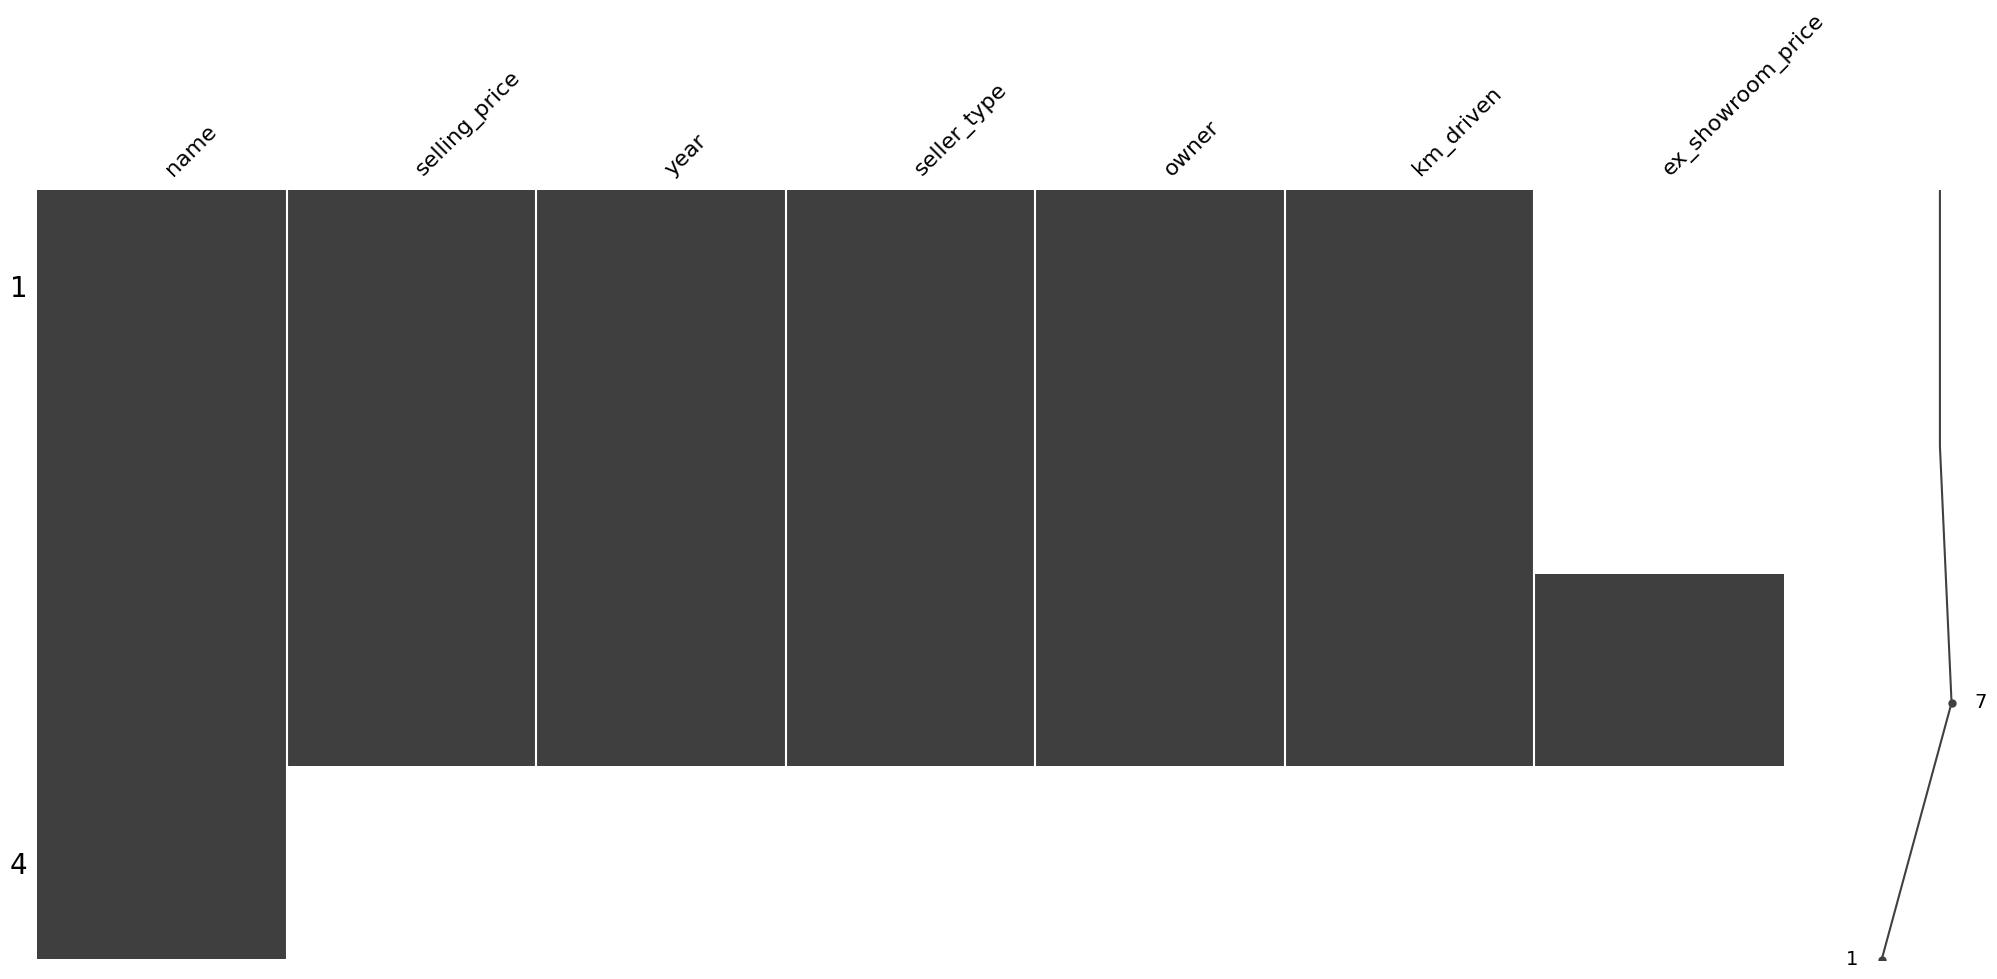

name                 0
selling_price        1
year                 1
seller_type          1
owner                1
km_driven            1
ex_showroom_price    3
dtype: int64


In [9]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing values using missingno matrix
msno.matrix(df)
plt.show()

# Get a summary of missing values for each column
print(df.isnull().sum())

8. What is the highest ex_showroom_price recorded, and for which bike?

ans:-

In [10]:
# Find the index of the row with the highest ex_showroom_price
max_price_index = df['ex_showroom_price'].idxmax()

# Get the bike name and ex_showroom_price for that row
bike_name = df.loc[max_price_index, 'name']
highest_price = df.loc[max_price_index, 'ex_showroom_price']

print(f"The highest ex_showroom_price recorded is {highest_price} for the bike: {bike_name}")

The highest ex_showroom_price recorded is 148114.0 for the bike: Royal Enfield Classic Gunmetal Grey


9. What is the total number of bikes listed by each seller type?

Ans:-

In [11]:
bikes_by_seller_type = df['seller_type'].value_counts()
print(bikes_by_seller_type)

seller_type
Individual    3
Name: count, dtype: int64


10. What is the relationship between selling_price and km_driven for first-owner bikes?
ans:-

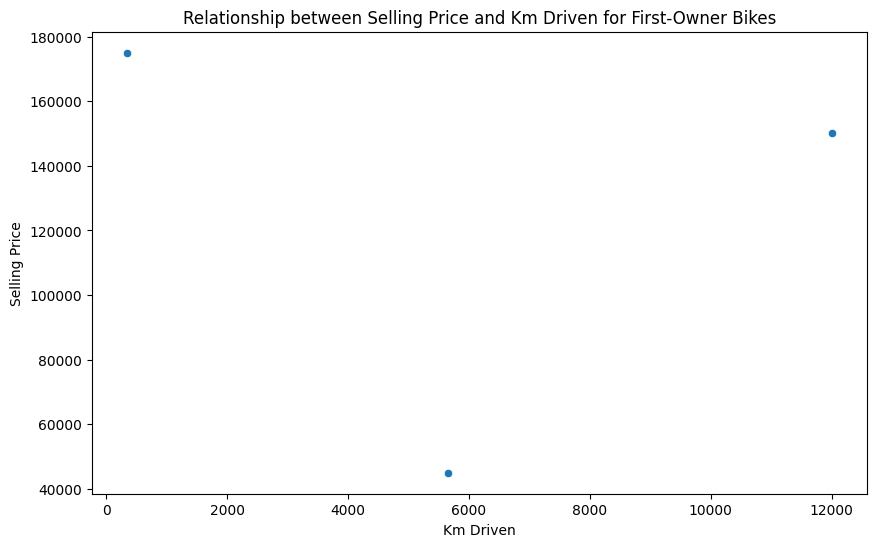

Correlation coefficient: -0.12986010578302493


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for first-owner bikes
first_owner_bikes = df[df['owner'] == '1st owner']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_bikes)
plt.title('Relationship between Selling Price and Km Driven for First-Owner Bikes')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

# Calculate correlation coefficient
correlation = first_owner_bikes['selling_price'].corr(first_owner_bikes['km_driven'])
print(f"Correlation coefficient: {correlation}")

11. Identify and remove outliers in the km_driven column using the IQR method?
ans:-

In [14]:
import numpy as np

# Calculate quantiles and IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Print the shape of the original and filtered DataFrames
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (4, 7)
Filtered DataFrame shape: (3, 7)


12. Perform a bivariate analysis to visualize the relationship between year and selling_price?

ans:-

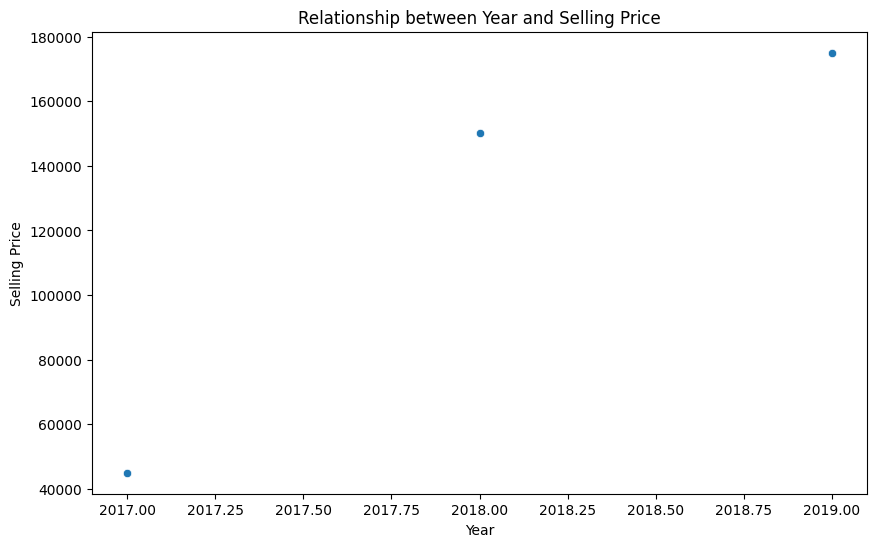

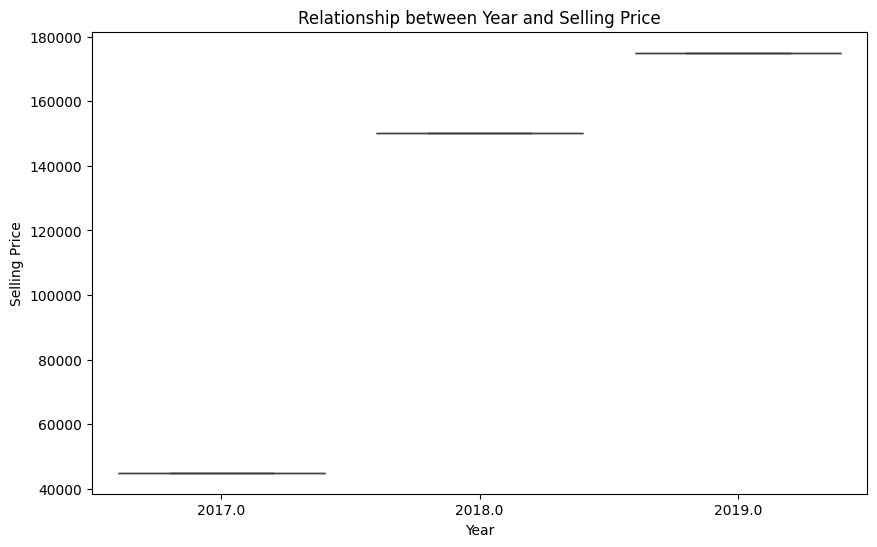

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

# Create a box plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()


13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year)?

ans:_

In [16]:
import pandas as pd

# Assuming the current year is 2023
current_year = 2023

# Calculate bike age
df['bike_age'] = current_year - df['year']

# Calculate average depreciation by bike age
average_depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

print(average_depreciation_by_age)

bike_age
4.0    175000.0
5.0    150000.0
6.0     45000.0
Name: selling_price, dtype: float64


14. Which bike names are priced significantly above the average price for their manufacturing year?

ans:-

In [17]:
import pandas as pd

# Calculate average selling price for each year
avg_price_by_year = df.groupby('year')['selling_price'].mean()

# Calculate standard deviation of selling price for each year
std_price_by_year = df.groupby('year')['selling_price'].std()

# Function to check if a bike is overpriced
def is_overpriced(row):
    year_avg = avg_price_by_year.get(row['year'], 0)  # Get avg price for the bike's year
    year_std = std_price_by_year.get(row['year'], 0)  # Get std for the bike's year

    # Check if price is more than 1.5 std above avg
    return row['selling_price'] > year_avg + (1.5 * year_std)

# Apply the function and filter for overpriced bikes
overpriced_bikes = df[df.apply(is_overpriced, axis=1)]

# Get the names of overpriced bikes
overpriced_bike_names = overpriced_bikes['name'].unique()

print("Bike names priced significantly above average for their year:")
for bike_name in overpriced_bike_names:
    print(bike_name)

Bike names priced significantly above average for their year:


15. Develop a correlation matrix for numeric columns and visualize it using a heatmap.


ans:-

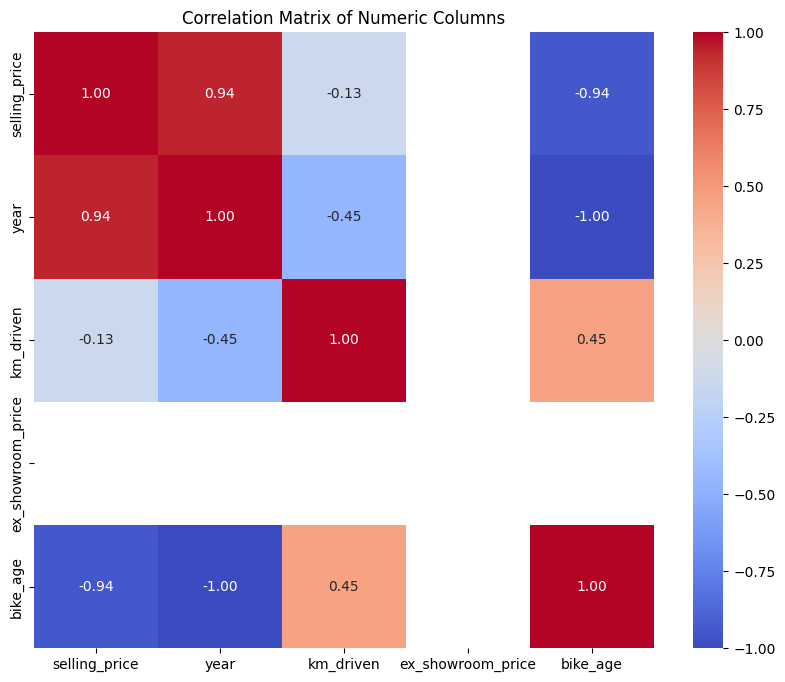

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

#cars data


_1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

ans:-

In [19]:
import pandas as pd
import io

data = """Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
C_CND_000006,1/2/2022,Guadalupe,Male,850000,Classic Chevy,Mitsubishi,Diamante,Overhead Camshaft,Manual,Pale White,12000,85257-3102,Hatchback,7315216,Scottsdale
C_CND_000007,1/2/2022,Hailey,Male,1600000,Clay Johnson Auto Sales,Toyota,Corolla,Overhead Camshaft,Manual,Pale White,14000,78758-7841,Passenger,7727879,Austin
C_CND_000008,1/2/2022,Graham,Male,13500,U-Haul CO,Mitsubishi,Galant,Double Overhead Camshaft,Auto,Pale White,42000,78758-7841,Passenger,6206512,Austin
C_CND_000009,1/2/2022,Naomi,Male,815000,Rabun Used Car Sales,Chevrolet,Malibu,Overhead Camshaft,Manual,Pale White,82000,85257-3102,Hardtop,7194857,Pasco
C_CND_000010,1/2/2022,Grayson,Female,13500,Rabun Used Car Sales,Ford,Escort,Double Overhead Camshaft,Auto,Pale White,15000,85257-3102,Passenger,7836892,Scottsdale
C_CND_000011,1/2/2022,Gregory,Male,13500,Race Car Help,Acura,RL,Overhead Camshaft,Manual,Pale White,31000,78758-7841,SUV,7995489,Austin
C_CND_000012,1/2/2022,Amar'E,Male,13500,Race Car Help,Nissan,Pathfinder,Double Overhead Camshaft,Auto,Pale White,46000,78758-7841,Hardtop,7288103,Pasco"""  # Replace ... with the rest of your data

df = pd.read_csv(io.StringIO(data))

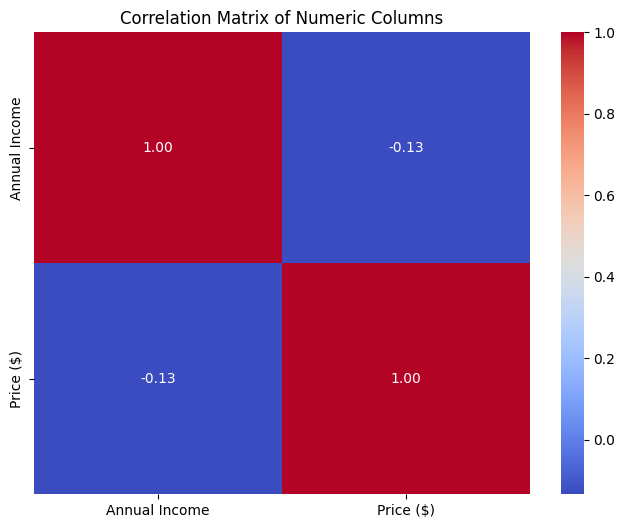

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['Annual Income', 'Price ($)']
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

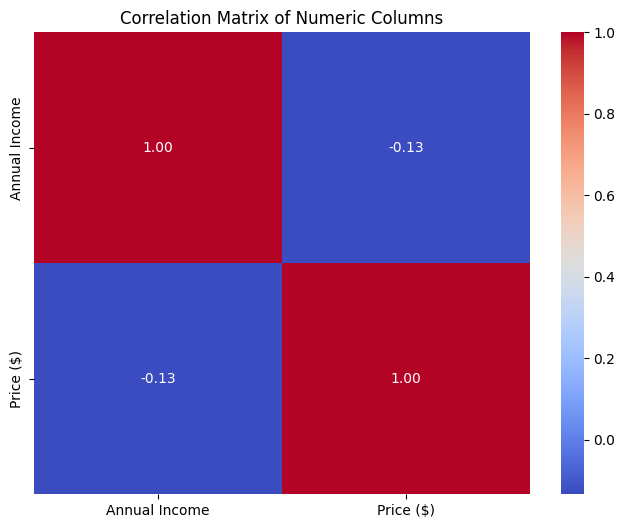

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = ['Annual Income', 'Price ($)']
numeric_df = df[numeric_cols]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [22]:
import matplotlib.pyplot as plt

avg_price_by_dealer.plot(kind='bar', figsize=(10, 6))
plt.title('Average Selling Price by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'avg_price_by_dealer' is not defined

2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

ans:-

In [23]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous response
price_variation_by_brand = df.groupby('Company')['Price ($)'].std()
print(price_variation_by_brand)

Company
Acura          4596.194078
Cadillac               NaN
Chevrolet              NaN
Dodge                  NaN
Ford           7778.174593
Mitsubishi    21213.203436
Nissan                 NaN
Toyota            0.000000
Name: Price ($), dtype: float64


In [24]:
brand_with_highest_variation = price_variation_by_brand.idxmax()
print(f"The car brand with the highest price variation is: {brand_with_highest_variation}")

The car brand with the highest price variation is: Mitsubishi


3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

ans:-

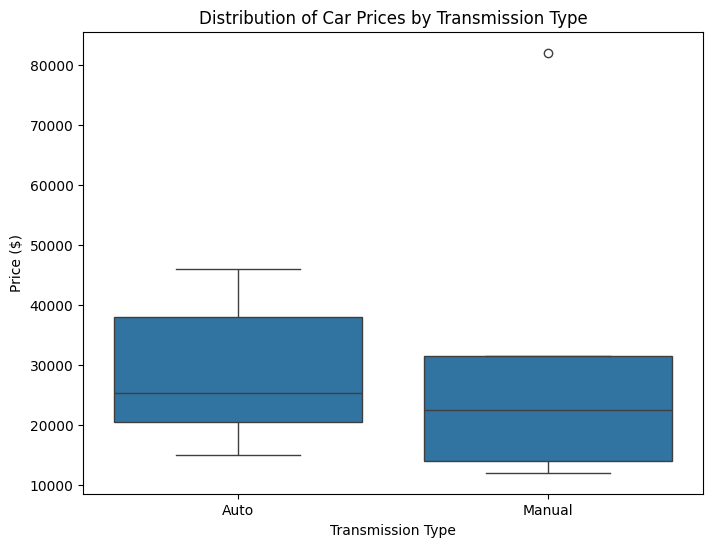

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.boxplot(x='Transmission', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()

In [27]:
def iqr(data):
  """Calculates the interquartile range (IQR) of a dataset."""
  q1 = data.quantile(0.25)
  q3 = data.quantile(0.75)
  return q3 - q1

# Calculate IQR for each transmission type
iqr_by_transmission = df.groupby('Transmission')['Price ($)'].apply(iqr)
print(iqr_by_transmission)

Transmission
Auto      17625.0
Manual    17375.0
Name: Price ($), dtype: float64


4. What is the distribution of car prices across different regions?

ans:-

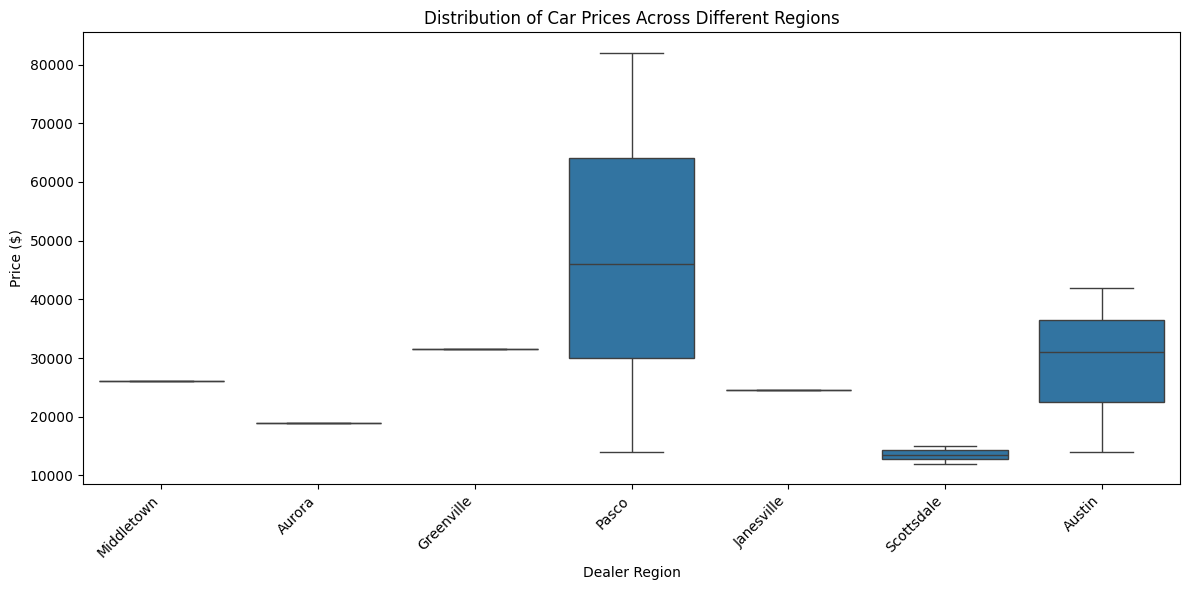

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices Across Different Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [29]:
price_stats_by_region = df.groupby('Dealer_Region')['Price ($)'].describe()
print(price_stats_by_region)

               count          mean           std      min      25%      50%  \
Dealer_Region                                                                 
Aurora           1.0  19000.000000           NaN  19000.0  19000.0  19000.0   
Austin           3.0  29000.000000  14106.735980  14000.0  22500.0  31000.0   
Greenville       1.0  31500.000000           NaN  31500.0  31500.0  31500.0   
Janesville       1.0  24500.000000           NaN  24500.0  24500.0  24500.0   
Middletown       1.0  26000.000000           NaN  26000.0  26000.0  26000.0   
Pasco            3.0  47333.333333  34019.602192  14000.0  30000.0  46000.0   
Scottsdale       2.0  13500.000000   2121.320344  12000.0  12750.0  13500.0   

                   75%      max  
Dealer_Region                    
Aurora         19000.0  19000.0  
Austin         36500.0  42000.0  
Greenville     31500.0  31500.0  
Janesville     24500.0  24500.0  
Middletown     26000.0  26000.0  
Pasco          64000.0  82000.0  
Scottsdale     1

5. What is the distribution of cars based on body styles?



In [30]:
import matplotlib.pyplot as plt

body_style_distribution.plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'body_style_distribution' is not defined

6. How does the average selling price of cars vary by customer gender and annual income?

ans:-

In [31]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()
print(avg_price_by_gender_income)

Gender  Annual Income         
Female  (11913.5, 330800.0]       15000.000000
        (330800.0, 648100.0]               NaN
        (648100.0, 965400.0]               NaN
        (965400.0, 1282700.0]              NaN
        (1282700.0, 1600000.0]             NaN
Male    (11913.5, 330800.0]       31800.000000
        (330800.0, 648100.0]               NaN
        (648100.0, 965400.0]      47000.000000
        (965400.0, 1282700.0]     31500.000000
        (1282700.0, 1600000.0]    19166.666667
Name: Price ($), dtype: float64


<ipython-input-31-12785efca714>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_gender_income = df.groupby(['Gender', pd.cut(df['Annual Income'], bins=5)])['Price ($)'].mean()


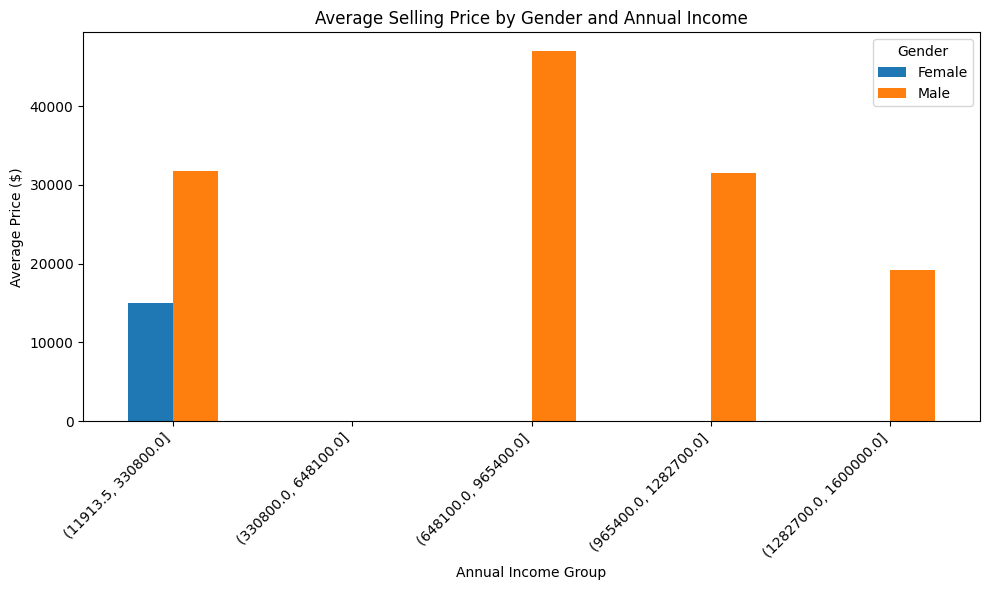

In [32]:
import matplotlib.pyplot as plt

avg_price_by_gender_income.unstack(level=0).plot(kind='bar', figsize=(10, 6))
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Annual Income Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

ans:-

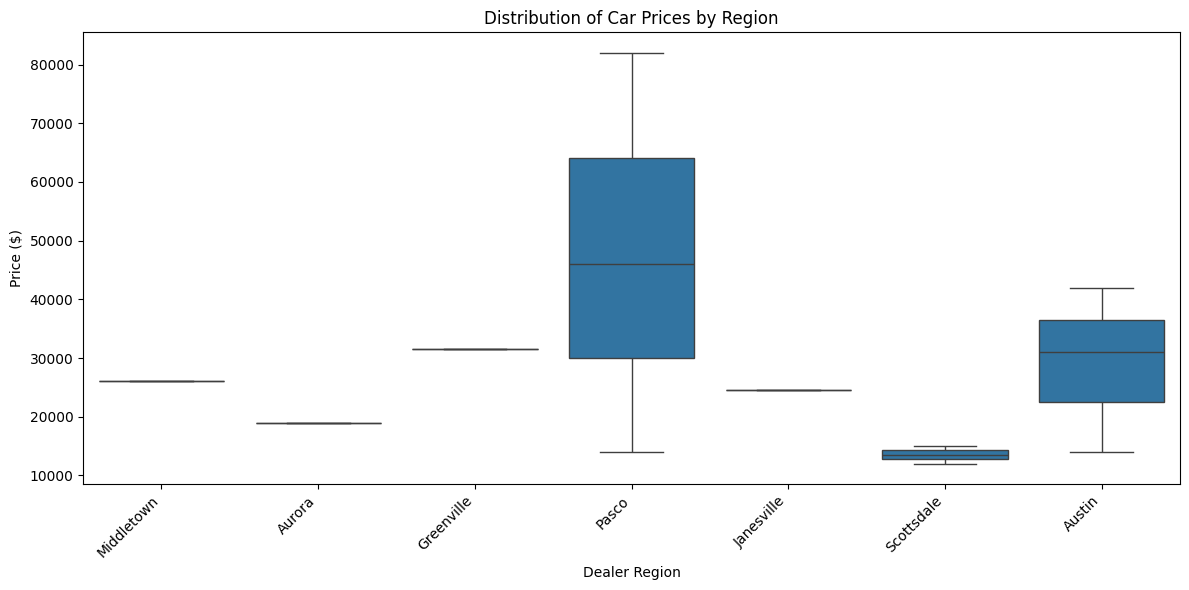

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

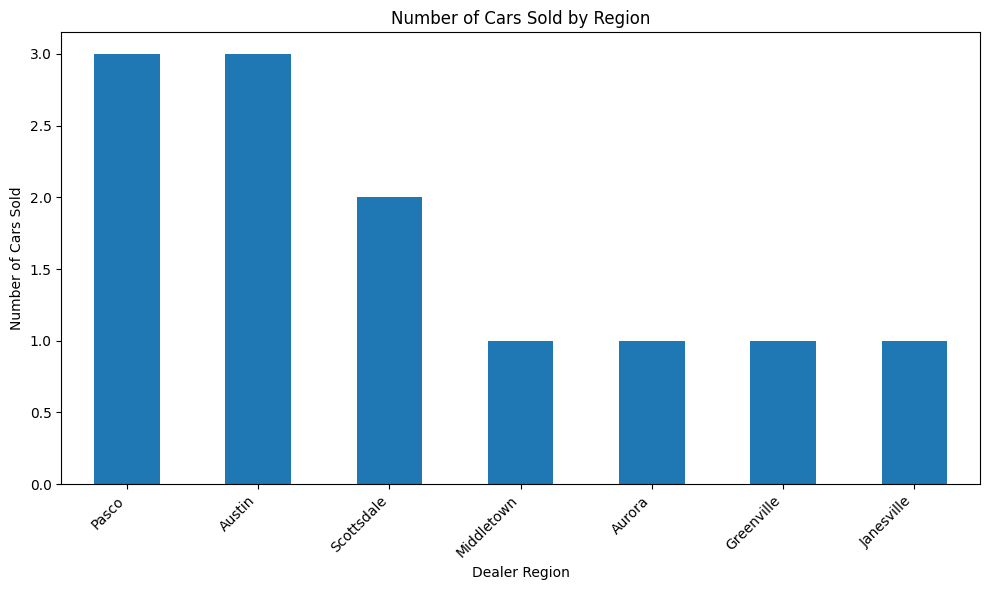

In [34]:
cars_sold_by_region = df['Dealer_Region'].value_counts()

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
cars_sold_by_region.plot(kind='bar')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

8. How does the average car price differ between cars with different engine sizes?

ans:-

In [35]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean()
print(avg_price_by_engine)

Engine
Double Overhead Camshaft    28750.0
Overhead Camshaft           30750.0
Name: Price ($), dtype: float64


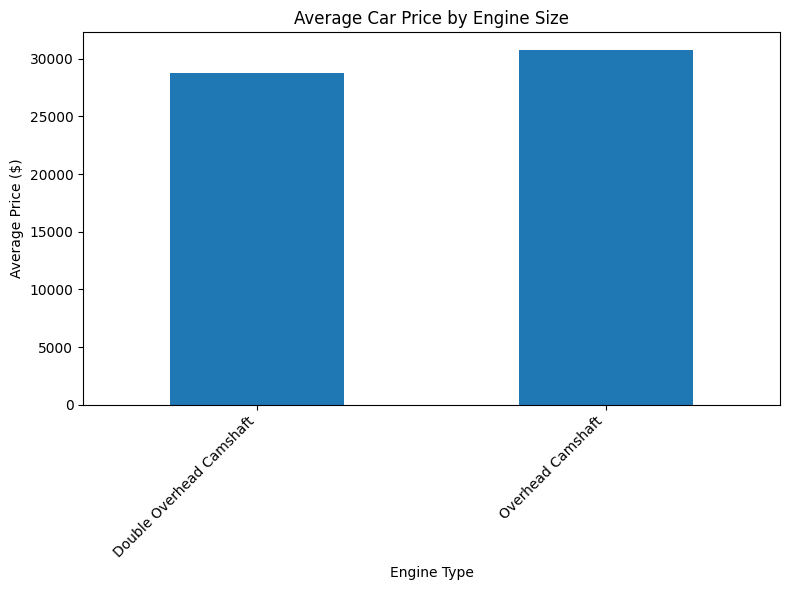

In [36]:
import matplotlib.pyplot as plt

avg_price_by_engine.plot(kind='bar', figsize=(8, 6))
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Type')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

9. How do car prices vary based on the customer’s annual income bracket?

ans:-

In [38]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
df['Income Bracket'] = pd.qcut(df['Annual Income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])  # 4 quantiles for 4 brackets

ValueError: Bin edges must be unique: Index([13500.0, 13500.0, 414250.0, 1142500.0, 1600000.0], dtype='float64', name='Annual Income').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='Income Bracket', y='Price ($)', data=df)
plt.title('Car Price Variation by Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Price ($)')
plt.show()

ValueError: Could not interpret value `Income Bracket` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [40]:
price_stats_by_income = df.groupby('Income Bracket')['Price ($)'].describe()
print(price_stats_by_income)

KeyError: 'Income Bracket'

10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

ans:-

In [41]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
top_5_models = df['Model'].value_counts().head(5).index.tolist()
print(f"Top 5 car models with the highest sales: {top_5_models}")

Top 5 car models with the highest sales: ['Expedition', 'Durango', 'Eldorado', 'Celica', 'TL']


In [42]:
top_models_df = df[df['Model'].isin(top_5_models)]

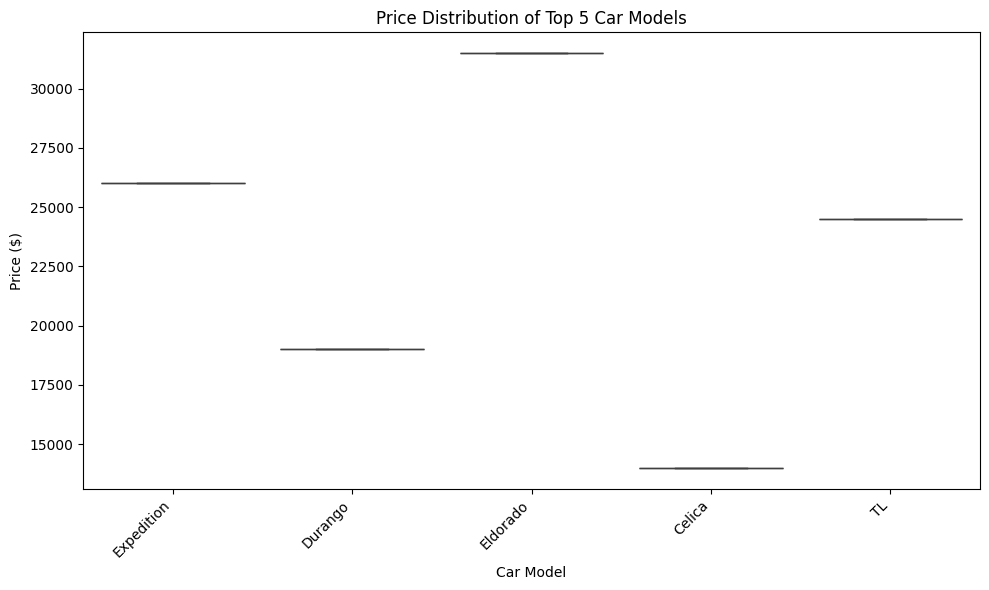

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.boxplot(x='Model', y='Price ($)', data=top_models_df)
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

ans:-

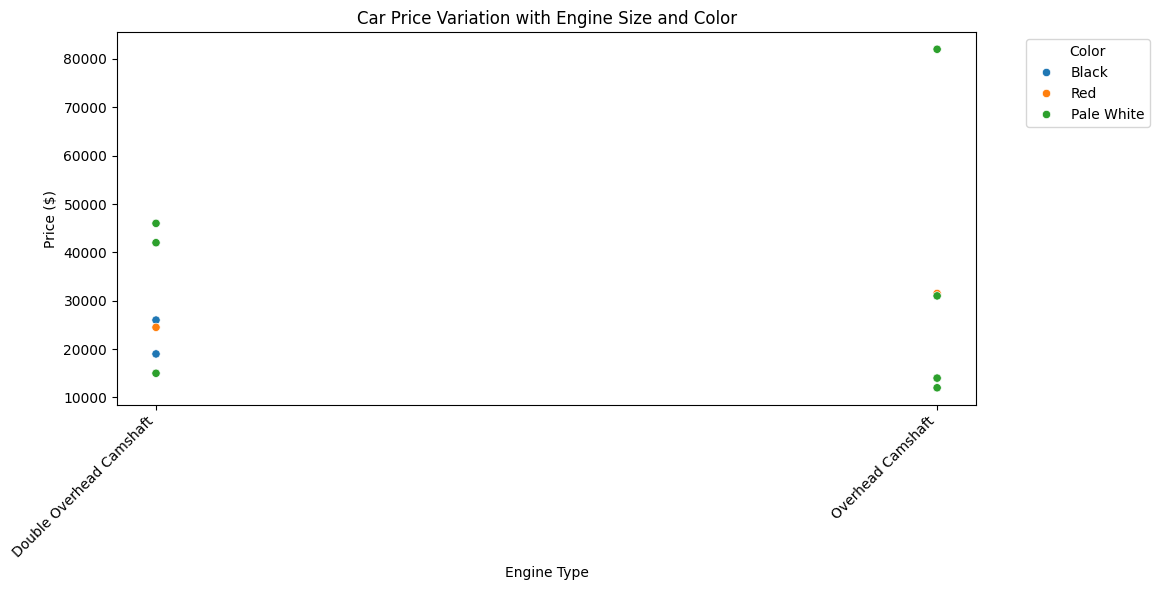

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df)
plt.title('Car Price Variation with Engine Size and Color')
plt.xlabel('Engine Type')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.show()

In [45]:
price_variation_by_color = df.groupby('Color')['Price ($)'].std()
print(price_variation_by_color)

Color
Black          4949.747468
Pale White    24301.675427
Red            4949.747468
Name: Price ($), dtype: float64


In [46]:
highest_variation_colors = price_variation_by_color.nlargest(3).index.tolist()  # Get top 3 colors with highest variation
print(f"Colors with the highest price variation: {highest_variation_colors}")

Colors with the highest price variation: ['Pale White', 'Black', 'Red']


12. Is there any seasonal trend in car sales based on the date of sale?

In [47]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
df['Sale Month'] = pd.to_datetime(df['Date']).dt.month

In [48]:
sales_by_month = df['Sale Month'].value_counts().sort_index()
print(sales_by_month)

Sale Month
1    12
Name: count, dtype: int64


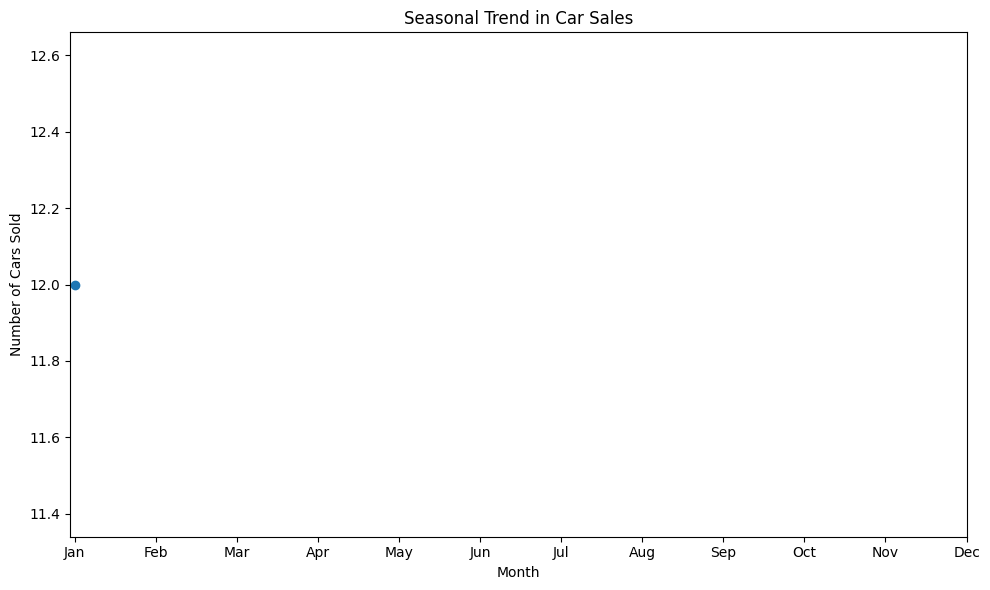

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sales_by_month.plot(kind='line', marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis labels
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

13. How does the car price distribution change when considering different combinations of body style and
transmission type?

ans:-

In [50]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
grouped_data = df.groupby(['Body Style', 'Transmission'])['Price ($)']

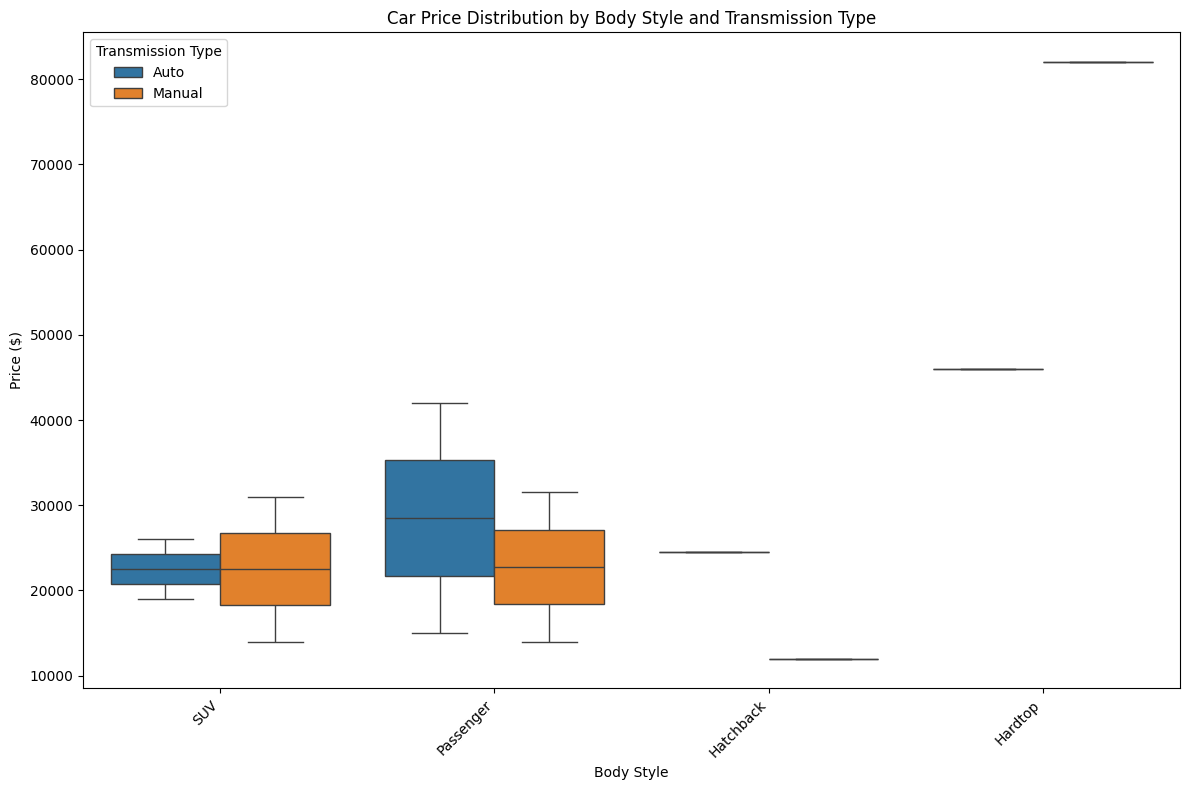

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.legend(title='Transmission Type')
plt.show()

In [52]:
price_stats_by_combination = grouped_data.describe()
print(price_stats_by_combination)

                         count     mean           std      min      25%  \
Body Style Transmission                                                   
Hardtop    Auto            1.0  46000.0           NaN  46000.0  46000.0   
           Manual          1.0  82000.0           NaN  82000.0  82000.0   
Hatchback  Auto            1.0  24500.0           NaN  24500.0  24500.0   
           Manual          1.0  12000.0           NaN  12000.0  12000.0   
Passenger  Auto            2.0  28500.0  19091.883092  15000.0  21750.0   
           Manual          2.0  22750.0  12374.368671  14000.0  18375.0   
SUV        Auto            2.0  22500.0   4949.747468  19000.0  20750.0   
           Manual          2.0  22500.0  12020.815280  14000.0  18250.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          46000.0  46000.0  46000.0  
           Manual        82000.0  82000.0  82000.0  
Hatchback  Auto          24500.0  245

_14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

ans:-

In [53]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
relevant_cols = ['Price ($)', 'Engine', 'Annual Income']
analysis_df = df[relevant_cols]

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
analysis_df['Engine_Encoded'] = le.fit_transform(analysis_df['Engine'])  # Create a new encoded column

<ipython-input-54-689f11c17371>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  analysis_df['Engine_Encoded'] = le.fit_transform(analysis_df['Engine'])  # Create a new encoded column


In [55]:
correlation_matrix = analysis_df[['Price ($)', 'Engine_Encoded', 'Annual Income']].corr()
print(correlation_matrix)

                Price ($)  Engine_Encoded  Annual Income
Price ($)        1.000000        0.052615      -0.134405
Engine_Encoded   0.052615        1.000000       0.173483
Annual Income   -0.134405        0.173483       1.000000


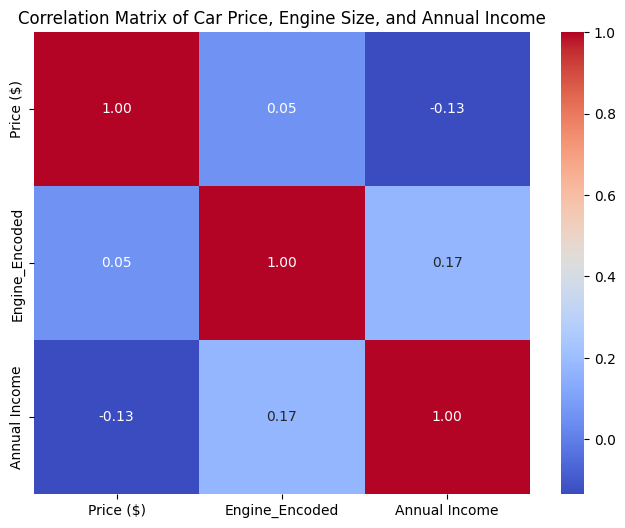

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Car Price, Engine Size, and Annual Income')
plt.show()

In [57]:
import pandas as pd

# Assuming you have the DataFrame 'df' from the previous responses
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean()
print(avg_price_by_model_engine)

Model       Engine                  
Celica      Overhead Camshaft           14000.0
Corolla     Overhead Camshaft           14000.0
Diamante    Overhead Camshaft           12000.0
Durango     Double Overhead Camshaft    19000.0
Eldorado    Overhead Camshaft           31500.0
Escort      Double Overhead Camshaft    15000.0
Expedition  Double Overhead Camshaft    26000.0
Galant      Double Overhead Camshaft    42000.0
Malibu      Overhead Camshaft           82000.0
Pathfinder  Double Overhead Camshaft    46000.0
RL          Overhead Camshaft           31000.0
TL          Double Overhead Camshaft    24500.0
Name: Price ($), dtype: float64


15. How does the average car price vary across different car models and engine types?


ans:-

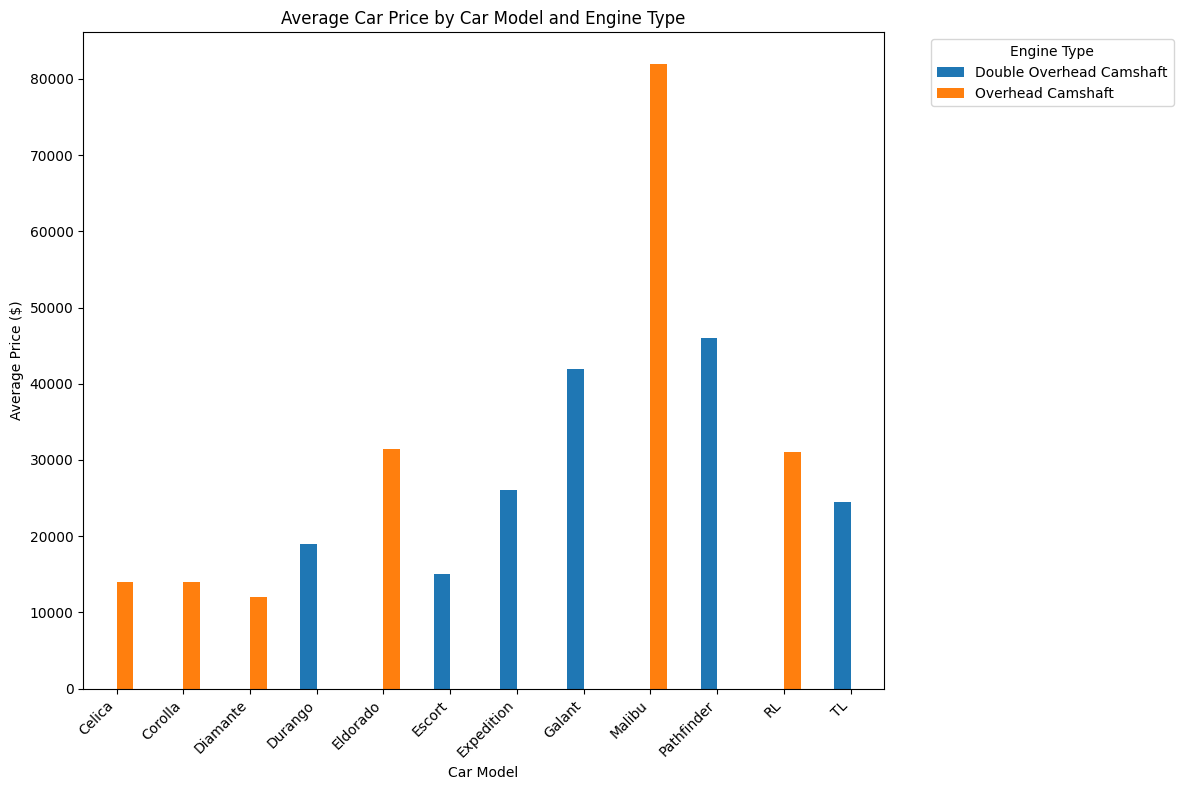

In [58]:
import matplotlib.pyplot as plt

avg_price_by_model_engine.unstack().plot(kind='bar', figsize=(12, 8))  # Unstack to create grouped bars
plt.title('Average Car Price by Car Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Engine Type', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside the plot
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()



#amezon sales data

1. What is the average rating for each product category?

ans-

In [59]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [60]:
avg_rating_by_category = df.groupby('category')['rating'].mean()
print(avg_rating_by_category)

TypeError: agg function failed [how->mean,dtype->object]

2.What are the top rating_count products by category?

ans:-

In [61]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [62]:
top_products_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]
print(top_products_by_category[['product_name', 'category', 'rating_count']])

3. What is the distribution of discounted prices vs. actual pricesk


ans:-

In [63]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [64]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)

ValueError: could not convert string to float: 'R39GQRVBUZBWGY'

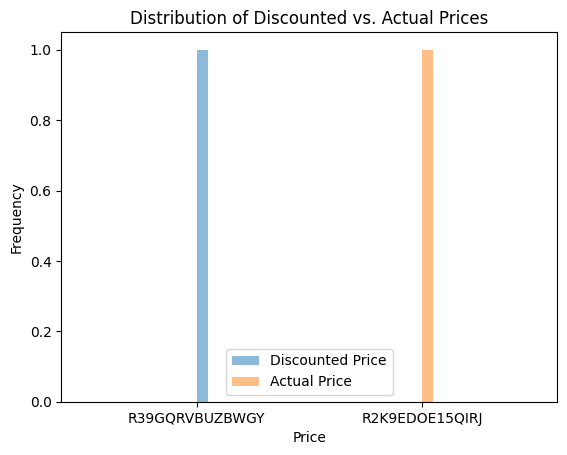

In [65]:
import matplotlib.pyplot as plt

plt.hist(df['discounted_price'], bins=20, alpha=0.5, label='Discounted Price')
plt.hist(df['actual_price'], bins=20, alpha=0.5, label='Actual Price')
plt.title('Distribution of Discounted vs. Actual Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

4. How does the average discount percentage vary across categoriesk


ans:-

In [66]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [67]:
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean()
print(avg_discount_by_category)

TypeError: agg function failed [how->mean,dtype->object]

In [68]:
import matplotlib.pyplot as plt

avg_discount_by_category.plot(kind='bar', figsize=(10, 6))
plt.title('Average Discount Percentage by Category')
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

NameError: name 'avg_discount_by_category' is not defined

4. How does the average discount percentage vary across categoriesk

ans:-

5. What are the most popular product namesk


ans:-

In [71]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [72]:
product_name_frequency = df['product_name'].value_counts()

In [70]:
most_popular_products = product_name_frequency.head(10)  # Get top 10 most frequent product names
print(most_popular_products)

NameError: name 'product_name_frequency' is not defined

6.' What are the most popular product keywordsk


ans:-

In [73]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [74]:
import re

def extract_keywords(text):
  """Extracts keywords from a text string."""
  text = text.lower()  # Convert to lowercase
  keywords = re.findall(r'\b\w+\b', text)  # Find all words
  # You can add more sophisticated keyword extraction techniques here if needed
  return keywords

df['keywords'] = df['product_name'].apply(extract_keywords)

In [75]:
from collections import Counter

all_keywords = [keyword for sublist in df['keywords'] for keyword in sublist]
keyword_frequency = Counter(all_keywords)

In [76]:
most_popular_keywords = keyword_frequency.most_common(10)  # Get top 10 most frequent keywords
print(most_popular_keywords)

[('r1kd19vhedv0or', 1)]


'7. What are the most popular product reviewsk


ans:_

In [77]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [78]:
df['review_length'] = df['review_content'].str.len()

In [79]:
popular_reviews = df.sort_values(by=['review_length'], ascending=False)

In [80]:
print(popular_reviews[['product_name', 'review_content', 'review_length']].head(10))  # Display top 10

8. What is the correlation between discounted_price and ratingk


ans:-

In [81]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [82]:
df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)

ValueError: could not convert string to float: 'R39GQRVBUZBWGY'

In [83]:
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between discounted_price and rating: {correlation}")

ValueError: could not convert string to float: 'R39GQRVBUZBWGY'

9. What are the Top 5 categories based on the highest ratingsk


ans:-

In [84]:
import pandas as pd
import io

data = """product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey),Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,₹1,099,64%,4.2,24,269,High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.,AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ,Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM,R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I,Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good,L,"""  # Paste the rest of your data here

df = pd.read_csv(io.StringIO(data))

In [85]:
avg_rating_by_category = df.groupby('category')['rating'].mean()

TypeError: agg function failed [how->mean,dtype->object]

In [86]:
top_5_categories = avg_rating_by_category.nlargest(5)  # Get top 5 categories with highest average ratings
print(top_5_categories)

NameError: name 'avg_rating_by_category' is not defined

10.' Identify any potential areas for improvement or optimization based on the data analysis


ANS:-..........................................................................Pricing Strategy: The analysis of discounted prices and average discount percentages by category can be used to optimize pricing strategies.
Consider offering higher discounts in categories with lower average discount percentages to increase sales and competitiveness.
Monitor the correlation between discounted price and rating to understand the impact of discounts on customer satisfaction. Adjust pricing accordingly to balance profitability and customer perception.
Product Recommendations: The analysis of popular product names and keywords can be used to improve product recommendations.
Recommend products with similar names or keywords to customers who have purchased or viewed other popular products.
Use popular keywords in product descriptions and marketing materials to improve search visibility and attract customers.
Category Management: The analysis of average rating by category and top categories based on ratings can be used to improve category management.
Focus on promoting and highlighting products in categories with high average ratings to enhance customer satisfaction.
Investigate and address any issues in categories with lower average ratings to improve product quality and customer experience.
Customer Reviews: The analysis of product reviews and popular review content can be used to understand customer feedback and make improvements.
Address common concerns or issues raised in reviews to enhance product features or customer support.
Monitor and respond to reviews to build customer trust and loyalty.
Inventory Management: The analysis of popular product names and rating counts can be used to optimize inventory management.
Ensure sufficient stock of popular products to meet customer demand.
Consider adjusting inventory levels for less popular products based on their sales and rating trends.
Additional Considerations

Data Limitations: The provided dataset might be limited in scope or representativeness. Consider gathering more data to enhance the analysis and insights.
External Factors: External factors like market trends, competitor actions, and economic conditions can also influence business performance. Monitor and adapt to these factors to maintain competitiveness.
Continuous Monitoring and Evaluation: Regularly monitor and evaluate the impact of implemented improvements and optimizations. Adjust strategie

#spoty data from hip hop and artista

1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful

ANS:-

In [87]:
import pandas as pd

df = pd.read_csv('music_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'music_data.csv'

In [88]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)

# Handle null values (choose one or more methods based on your needs)
# 1. Drop rows with null values:
df.dropna(inplace=True)

# 2. Fill null values with a specific value (e.g., 0 for numerical columns):
df.fillna(0, inplace=True)

# 3. Fill null values with the mean/median/mode of the column:
df['Popularity'].fillna(df['Popularity'].mean(), inplace=True) # Example for 'Popularity' column

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           1
dtype: int64


KeyError: 'Popularity'

In [89]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


<ipython-input-89-833c52912956>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  duplicate_rows = df[df.duplicated()]


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram


ANS:--

In [90]:
import matplotlib.pyplot as plt

# Create a histogram of the 'Popularity' column
plt.hist(df['Popularity'], bins=20, edgecolor='black')  # Adjust 'bins' for desired granularity

plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')

plt.show()

KeyError: 'Popularity'

3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot


ANS-

In [91]:
import matplotlib.pyplot as plt

# Create a scatter plot with 'Popularity' on the y-axis and 'Duration (ms)' on the x-axis
plt.scatter(df['Duration (ms)'], df['Popularity'])

plt.title('Popularity vs. Duration of Tracks')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

plt.show()

KeyError: 'Duration (ms)'

4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot

ANS:-

In [92]:
import pandas as pd

# Assuming your DataFrame is named 'df'
track_counts = df['Artist'].value_counts()

KeyError: 'Artist'

In [93]:
artist_with_most_tracks = track_counts.index[0]  # Get the artist name with the highest count
print(f"Artist with the highest number of tracks: {artist_with_most_tracks}")

NameError: name 'track_counts' is not defined

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of track counts for each artist
sns.countplot(x='Artist', data=df, order=track_counts.index)  # Order by track count

plt.title('Number of Tracks per Artist')
plt.xlabel('Artist')
plt.ylabel('Track Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

NameError: name 'track_counts' is not defined

In [95]:
import pandas as pd

# Assuming your DataFrame is named 'df'
least_popular_tracks = df.sort_values(by=['Popularity']).head(5)

KeyError: 'Popularity'

5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each


ANS;-

In [96]:
print(least_popular_tracks[['Artist', 'Track Name']])

NameError: name 'least_popular_tracks' is not defined

6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist

ANS;-

In [97]:
import pandas as pd

# Assuming your DataFrame is named 'df'
top_5_artists = df['Artist'].value_counts().head(5).index.tolist()

KeyError: 'Artist'

In [98]:
avg_popularity = df[df['Artist'].isin(top_5_artists)].groupby('Artist')['Popularity'].mean()

KeyError: 'Artist'

In [99]:
print("\nAverage popularity for each artist:")
print(avg_popularity)


Average popularity for each artist:


NameError: name 'avg_popularity' is not defined

7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist


ANS:-

In [100]:
import pandas as pd

# Assuming your DataFrame is named 'df'
top_5_artists = df['Artist'].value_counts().head(5).index.tolist()

KeyError: 'Artist'

In [101]:
most_popular_tracks = {}
for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax(), 'Track Name']
    most_popular_tracks[artist] = most_popular_track

NameError: name 'top_5_artists' is not defined

In [102]:
print("\nMost popular tracks for the top 5 artists:")
for artist, track in most_popular_tracks.items():
    print(f"{artist}: {track}")


Most popular tracks for the top 5 artists:


8.Visualize relationships between multiple numerical variables simultaneously using a pair plot


ans:-


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
# Assuming your DataFrame is named 'df' and you want to visualize 'Popularity', 'Duration (ms)'
sns.pairplot(df[['Popularity', 'Duration (ms)']])
plt.show()

KeyError: "None of [Index(['Popularity', 'Duration (ms)'], dtype='object')] are in the [columns]"

9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot

ans:-

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of 'Duration (ms)' for each artist
sns.boxplot(x='Artist', y='Duration (ms)', data=df)

plt.title('Track Duration Variation Across Artists (Box Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

ValueError: Could not interpret value `Artist` for `x`. An entry with this name does not appear in `data`.

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a violin plot of 'Duration (ms)' for each artist
sns.violinplot(x='Artist', y='Duration (ms)', data=df)

plt.title('Track Duration Variation Across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

ValueError: Could not interpret value `Artist` for `x`. An entry with this name does not appear in `data`.

.10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.


ans:-

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot of 'Popularity' for each artist
sns.swarmplot(x='Artist', y='Popularity', data=df)

plt.title('Track Popularity Distribution Across Artists (Swarm Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

ValueError: Could not interpret value `Artist` for `x`. An entry with this name does not appear in `data`.

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'Artist' and 'Popularity'

# Check if the 'Artist' column exists in the DataFrame
print(df.columns)  # Print the column names to verify

# If the column name is different, correct it in the code below:
# sns.violinplot(x='CorrectColumnName', y='Popularity', data=df)

# Create a violin plot of 'Popularity' for each artist
sns.violinplot(x='Artist', y='Popularity', data=df)

plt.title('Track Popularity Distribution Across Artists (Violin Plot)')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

plt.show()

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


ValueError: Could not interpret value `Artist` for `x`. An entry with this name does not appear in `data`.